In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
digits = datasets.load_digits()

In [3]:
digits.images[8]

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

<Figure size 432x288 with 0 Axes>

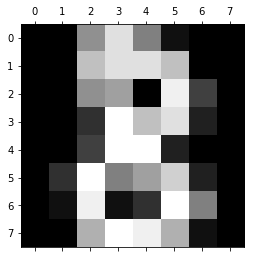

In [4]:
plt.gray() 
plt.matshow(digits.images[8])
plt.show()

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

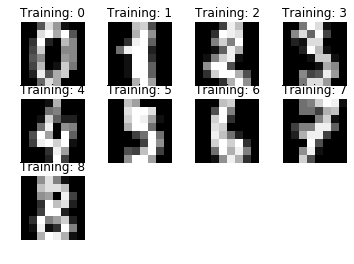

In [7]:
images_and_labels=list(zip(digits.images,digits.target))
for index, (image,label) in enumerate(images_and_labels[:9]):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(image,interpolation='nearest')
    plt.title('Training: %i' %label)

In [9]:
digits.images.shape

(1797, 8, 8)

In [12]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data[8]


array([ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
       12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
        3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
        0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
        3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.])

In [13]:
data.shape

(1797, 64)

In [14]:
clr=RandomForestClassifier(n_estimators=30,criterion='entropy')
clr.fit(data[:n_samples//2],digits.target[:n_samples//2]) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
expected=digits.target[n_samples//2:]
predicted=clr.predict(data[n_samples//2:])

In [19]:
clr.score(data[n_samples // 2:], expected)


0.914349276974416

In [20]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[85  0  0  0  1  1  1  0  0  0]
 [ 0 80  0  2  0  1  0  0  1  7]
 [ 1  0 78  4  0  0  0  0  0  3]
 [ 1  1  0 78  0  2  0  3  5  1]
 [ 1  0  0  0 86  0  0  1  0  4]
 [ 0  1  0  1  1 83  2  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  1  0  2  0  0 85  1  0]
 [ 0  4  1  4  1  3  0  2 73  0]
 [ 1  0  0  3  0  3  0  0  1 84]]


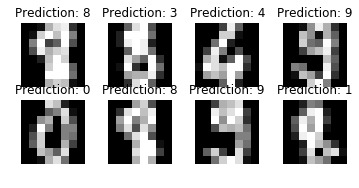

In [31]:

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(3, 4, index + 5)
    plt.axis('off')
    plt.imshow(image,  interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()